In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import copy
import seaborn as sns
from xgboost import plot_importance, plot_tree
from lightgbm import LGBMRegressor
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
np.random.seed(42)
random.seed(42)
RANDOM_SEED = 42
plt.style.use('fivethirtyeight')
sns.set()

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_csv('data.csv')
#data = data[data.Datetime < '2020-12-08'] # To modify as we will have more data
data.tail(48)

,Datetime,temp,templow,icon,baro,hum,rain,fog,thunder,snow,Année,Mois,Jour,Heure,Jour semaine,Férié,Vacances,curfew,intensite_greve,etat_barre_ce,q_ce,k_ce,etat_barre_lc,q_lc,k_lc,etat_barre_pv,q_pv,k_pv,year,sin_hour,cos_hour,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,quarter_1,quarter_2,quarter_3,quarter_4,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,sin_dayofyear,cos_dayofyear,sin_weekofyear,cos_weekofyear,dayofmonth_1,dayofmonth_2,dayofmonth_3,dayofmonth_4,dayofmonth_5,dayofmonth_6,dayofmonth_7,dayofmonth_8,dayofmonth_9,dayofmonth_10,dayofmonth_11,dayofmonth_12,dayofmonth_13,dayofmonth_14,dayofmonth_15,dayofmonth_16,dayofmonth_17,dayofmonth_18,dayofmonth_19,dayofmonth_20,dayofmonth_21,dayofmonth_22,dayofmonth_23,dayofmonth_24,dayofmonth_25,dayofmonth_26,dayofmonth_27,dayofmonth_28,dayofmonth_29,dayofmonth_30,dayofmonth_31,Wx,Wy,desc_Broken clouds.,desc_Chilly.,desc_Clear.,desc_Cloudy.,desc_Cool.,desc_Dense fog.,desc_Drizzle. Broken clouds.,desc_Drizzle. Fog.,desc_Drizzle. Low clouds.,desc_Drizzle. Mostly cloudy.,desc_Fog.,desc_Haze.,desc_Ice fog.,desc_Light fog.,desc_Light rain. Broken clouds.,desc_Light rain. Clear.,desc_Light rain. Cloudy.,desc_Light rain. Fog.,desc_Light rain. Low clouds.,desc_Light rain. More clouds than sun.,desc_Light rain. Mostly cloudy.,desc_Light rain. Overcast.,desc_Light rain. Partly cloudy.,desc_Light rain. Partly sunny.,desc_Light rain. Passing clouds.,desc_Light snow. Ice fog.,desc_Low clouds.,desc_Mild.,desc_More clouds than sun.,desc_Mostly cloudy.,desc_No weather data available,desc_Overcast.,desc_Partly cloudy.,desc_Partly sunny.,desc_Passing clouds.,desc_Rain. Fog.,desc_Scattered clouds.,desc_Sprinkles. Mostly cloudy.,desc_Sunny.,desc_Thunderstorms. Fog.,confinement
60984,2020-12-16 00:00:00,8.7,8.7,14.0,1020.0,84.0,0.0,0.0,0.0,0.0,2020.0,12.0,16.0,0.0,3.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,0.000000e+00,1.000000e+00,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,-0.242567,0.970135,-0.234886,0.972023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-17.854160,-6.498383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
60985,2020-12-16 01:00:00,8.6,8.6,14.0,1020.0,85.0,0.0,0.0,0.0,0.0,2020.0,12.0,16.0,1.0,3.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,2.588190e-01,9.659258e-01,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,-0.242567,0.970135,-0.234886,0.972023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-19.733545,-7.182423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
60986,2020-12-16 02:00:00,8.4,8.4,14.0,1020.0,86.0,0.0,0.0,0.0,0.0,2020.0,12.0,16.0,2.0,3.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,5.000000e-01,8.660254e-01,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,-0.242567,0.970135,-0.234886,0.972023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-17.964853,-6.185795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
60987,2020-12-16 03:00:00,8.2,8.2,14.0,1020.0,86.0,0.0,0.0,0.0,0.0,2020.0,12.0,16.0,3.0,3.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,7.071068e-01,7.071068e-01,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,-0.242567,0.970135,-0.234886,0.972023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-15.974775,-5.814342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
60988,2020-12-16 04:00:00,7.9,7.9,14.0,1020.0,87.0,0.0,0.0,0.0,0.0,2020.0,12.0,16.0,4.0,3.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20

In [4]:
### Create for each street a dataframe
drop = ['etat_barre_ce', 'etat_barre_lc', 'templow', 'baro', 'etat_barre_pv', 'Année', 'Mois', 'Jour', 'Heure', 'Jour semaine']
target_ce = ['q_ce', 'k_ce']
target_lc = ['q_lc', 'k_lc']
target_pv = ['q_pv', 'k_pv']
all_ = drop + target_ce + target_lc + target_pv
features = [x for x in data.columns.tolist() if x not in all_]
df = copy.deepcopy(data)
df = df.drop(drop, axis=1)
df_ce = copy.deepcopy(df[features + target_ce])
df_lc = copy.deepcopy(df[features + target_lc])
df_pv = copy.deepcopy(df[features + target_pv])

In [5]:
df_ce = df_ce.drop(['temp',
 'icon',
 'hum',
 'rain',
 'fog',
 'thunder',
 'snow','desc_Broken clouds.', 'desc_Chilly.', 'desc_Clear.',
       'desc_Cloudy.', 'desc_Cool.', 'desc_Dense fog.',
       'desc_Drizzle. Broken clouds.', 'desc_Drizzle. Fog.',
       'desc_Drizzle. Low clouds.', 'desc_Drizzle. Mostly cloudy.',
       'desc_Fog.', 'desc_Haze.', 'desc_Ice fog.', 'desc_Light fog.',
       'desc_Light rain. Broken clouds.', 'desc_Light rain. Clear.',
       'desc_Light rain. Cloudy.', 'desc_Light rain. Fog.',
       'desc_Light rain. Low clouds.',
       'desc_Light rain. More clouds than sun.',
       'desc_Light rain. Mostly cloudy.', 'desc_Light rain. Overcast.',
       'desc_Light rain. Partly cloudy.',
       'desc_Light rain. Partly sunny.',
       'desc_Light rain. Passing clouds.', 'desc_Light snow. Ice fog.',
       'desc_Low clouds.', 'desc_Mild.', 'desc_More clouds than sun.',
       'desc_Mostly cloudy.', 'desc_No weather data available',
       'desc_Overcast.', 'desc_Partly cloudy.', 'desc_Partly sunny.',
       'desc_Passing clouds.', 'desc_Rain. Fog.',
       'desc_Scattered clouds.', 'desc_Sprinkles. Mostly cloudy.',
       'desc_Sunny.', 'desc_Thunderstorms. Fog.'], axis=1)

# Utils

In [6]:
def rolling_custom(d, df, label):
    try:
        return df.loc[d - 168, label]
    except KeyError:
        return float('nan')
    
def create_train_test(df, date_min, date_max, label, prefix, start, dropna=True):
    if dropna:
        drop = df[label + '_' + prefix].notnull()
        train, test = df[(df.Datetime <= date_min) & drop & (df.Datetime >= start)].reset_index(drop=True), df[(df.Datetime > date_min) & (df.Datetime <= date_max) & drop].reset_index(drop=True)
    x_train, y_train = train.drop(['Datetime', 'q_' + prefix, 'k_' + prefix], axis=1), train[['Datetime', label + '_' + prefix]]
    x_test, y_test = test.drop(['Datetime', 'q_' + prefix, 'k_' + prefix], axis=1), test[['Datetime', label + '_' + prefix]]
    return x_train, y_train, x_test, y_test

def train(models, X_train, y_train, X_test, y_test):
    model_trained = []
    for model in models:
        model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
                early_stopping_rounds=40, 
                  verbose=False)       
        model_trained.append(model)
    return model_trained

def predict_mean_average(y_pred1, y_pred2, y_test_date=None):
    return (y_pred1+y_pred2)/2

def predict_max_min(y_pred1, y_pred2, x_test_date):
    x_test_date['Datetime'] = pd.to_datetime(x_test_date['Datetime']) ## sanity check
    index_labels = x_test_date.reset_index().set_index('Datetime')
    index_day = index_labels.between_time('07:00', '22:00')['index'].tolist()
    final_prediction = []
    for i, preds in enumerate(zip(y_pred1, y_pred2)):
        if i in index_day:
            final_prediction.append(max(preds))
        else:
            final_prediction.append(min(preds))
    return np.array(final_prediction)

def get_predictions(x_pred, models, tp='mean_average'):
    y_pred = []
    for model in models:
        y_pred.append(model.predict(x_pred.drop(['Datetime'], axis=1)))
    if tp == 'mean_average':
        return predict_mean_average(y_pred[0], y_pred[1])
    else:
        return predict_max_min(y_pred[0], y_pred[1], x_pred)
        
def generate_x_pred(df, prefix):
    x_pred = df[(df.Datetime >= '2020-12-11 01:00:00') & (df.Datetime <= '2020-12-17 00:00:00')].drop(['q_' + prefix, 'k_' + prefix], axis=1).reset_index(drop=True)
    return x_pred  

In [7]:
dict_pred = {'Champs-Elysées': {}, 'Convention': {}, 'Saint-Pères': {}}

# Train & Pred

## Champs Elysées

# q (débit horaire)

In [8]:
X_train, y_train_date, X_test, y_test_date = create_train_test(df_ce, '2020-12-05', '2020-12-11', 'q', 'ce', '2020-10-01')
models = [LGBMRegressor(n_estimators=300, subsample=0.8, num_leaves=25, learning_rate=0.15, random_state=27),
         XGBRegressor(n_estimators=300, subsample=0.8, random_state=27)]
y_train, y_test = y_train_date.drop(['Datetime'], axis=1), y_test_date.drop(['Datetime'], axis=1)
trained = train(models, X_train, y_train, X_test, y_test)
x_pred = generate_x_pred(df_ce, 'ce')
preds = get_predictions(x_pred, trained)
dict_pred['Champs-Elysées']['Débit horaire'] = preds

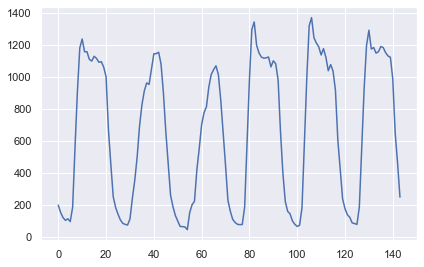

In [9]:
plt.plot(dict_pred['Champs-Elysées']['Débit horaire'])

### k (Taux d'occupation)

In [10]:
X_train, y_train_date, X_test, y_test_date = create_train_test(df_ce, '2020-12-05', '2020-12-11', 'k', 'ce', '2020-08-01')
models = [LGBMRegressor(learning_rate = 0.15, subsample_freq=2, subsample=0.8, num_leaves=25, n_estimators=300, random_state=27),
         XGBRegressor(n_estimators=300, subsample = 0.6, min_child_weight=5,  max_depth=4, random_state=27)]
y_train, y_test = y_train_date.drop(['Datetime'], axis=1), y_test_date.drop(['Datetime'], axis=1)
trained = train(models, X_train, y_train, X_test, y_test)
x_pred = generate_x_pred(df_ce, 'ce')
preds = get_predictions(x_pred, trained, tp='min_max')
dict_pred['Champs-Elysées']["Taux d'occupation"] = abs(preds)

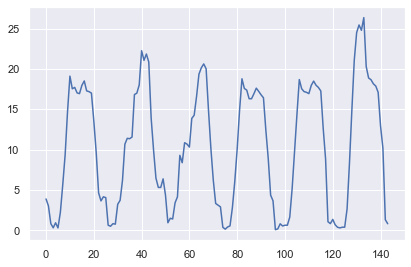

In [11]:
plt.plot(dict_pred['Champs-Elysées']["Taux d'occupation"])

## Convention

### Q (débit horaire)

In [12]:
df_lc['back_q'] = pd.Series([rolling_custom(d, df_lc, 'q_lc') for d in df_lc.index])
X_train, y_train_date, X_test, y_test_date = create_train_test(df_lc, '2020-12-05', '2020-12-11', 'q', 'lc', '2020-02-01')
models = [LGBMRegressor(n_estimators=300, subsample=0.8, max_depth=4, colsample_bytree=0.8, 
                        subsample_freq=2, num_leaves=15, random_state=27),
         XGBRegressor(n_estimators=300, max_depth=4, min_child_weight=5, subsample=0.6, random_state=27)]
y_train, y_test = y_train_date.drop(['Datetime'], axis=1), y_test_date.drop(['Datetime'], axis=1)
trained = train(models, X_train, y_train, X_test, y_test)
x_pred = generate_x_pred(df_lc, 'lc')
preds = get_predictions(x_pred, trained, tp='min_max')
dict_pred['Convention']["Débit horaire"] = preds

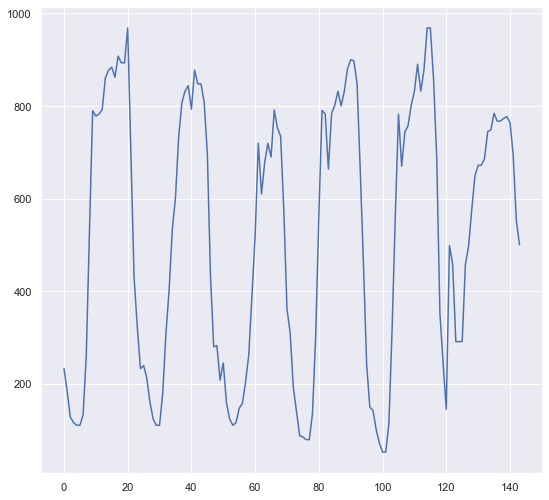

In [13]:
plt.figure(figsize=(8,8))
plt.plot(dict_pred['Convention']["Débit horaire"])

### k (taux d'occupation)

In [14]:
df_lc = df_lc.drop(['back_q'], axis=1)
df_lc['back_k'] = pd.Series([rolling_custom(d, df_lc, 'k_lc') for d in df_lc.index])
X_train, y_train_date, X_test, y_test_date = create_train_test(df_lc, '2020-12-05', '2020-12-11', 'k', 'lc', '2020-02-01')
models = [LGBMRegressor(subsample=0.8, subsample_freq=2, colsample_bytree=0.8, num_leaves=15, n_estimators=300, random_state=27),
         XGBRegressor(random_state = 27, colsample_bytree=0.7, max_depth=4, min_child_weight=5, subsample=0.8,
                      n_estimators=300)]
y_train, y_test = y_train_date.drop(['Datetime'], axis=1), y_test_date.drop(['Datetime'], axis=1)
trained = train(models, X_train, y_train, X_test, y_test)
x_pred = generate_x_pred(df_lc, 'lc')
preds = get_predictions(x_pred, trained)
dict_pred['Convention']["Taux d'occupation"] = abs(preds)

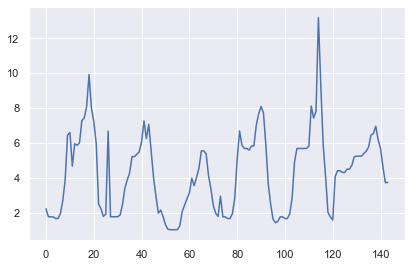

In [15]:
plt.plot(dict_pred['Convention']["Taux d'occupation"])

## Saint Peres

### Q (débit horaire)

In [16]:
df_pv['back_q'] = pd.Series([rolling_custom(d, df_pv, 'q_pv') for d in df_pv.index])
X_train, y_train_date, X_test, y_test_date = create_train_test(df_pv, '2020-12-05', '2020-12-11', 'q', 'pv', '2020-01-01')
models = [LGBMRegressor(colsample_bytree=0.8, subsample=0.8, num_leaves=25, n_estimators=300, subsample_freq=1,
                        random_state=27),
         XGBRegressor(random_state = 27, max_depth=8, min_child_weight=5, n_estimators=300)]
y_train, y_test = y_train_date.drop(['Datetime'], axis=1), y_test_date.drop(['Datetime'], axis=1)
trained = train(models, X_train, y_train, X_test, y_test)
x_pred = generate_x_pred(df_pv, 'pv')
preds = get_predictions(x_pred, trained, tp='min_max')
dict_pred["Saint-Pères"]["Débit horaire"] = preds

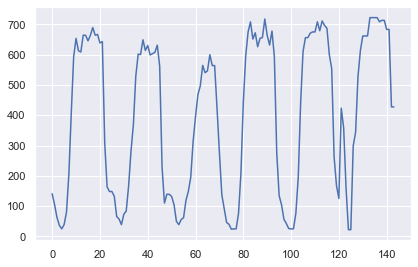

In [17]:
plt.plot(dict_pred["Saint-Pères"]["Débit horaire"])

### k (taux d'occupation)

In [18]:
df_pv['back_k'] = pd.Series([rolling_custom(d, df_pv, 'k_pv') for d in df_pv.index])
X_train, y_train_date, X_test, y_test_date = create_train_test(df_pv, '2020-12-05', '2020-12-11', 'k', 'pv', '2020-01-01')
models = [LGBMRegressor(colsample_bytree=0.8, subsample=0.8, subsample_freq=1, n_estimators=300, random_state=27),
         XGBRegressor(random_state = 27, max_depth=6, subsample=0.6, n_estimators=300)]
y_train, y_test = y_train_date.drop(['Datetime'], axis=1), y_test_date.drop(['Datetime'], axis=1)
trained = train(models, X_train, y_train, X_test, y_test)
x_pred = generate_x_pred(df_pv, 'pv')
preds = get_predictions(x_pred, trained, tp='min_max')
dict_pred["Saint-Pères"]["Taux d'occupation"] = preds

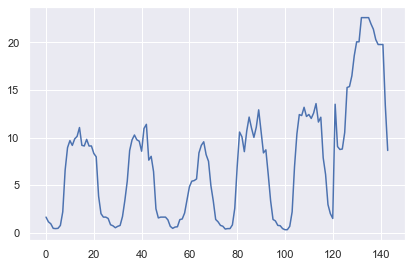

In [19]:
plt.plot(preds)

# Dataframe Generation

In [24]:
df_champs = pd.DataFrame(dict_pred['Champs-Elysées'], index=x_pred.Datetime)
df_champs['Arc'] = 'Champs-Elysées'

In [25]:
df_convention = pd.DataFrame(dict_pred['Convention'], index=x_pred.Datetime)
df_convention['Arc'] = 'Convention'

In [28]:
df_sp = pd.DataFrame(dict_pred["Saint-Pères"], index=x_pred.Datetime)
df_sp['Arc'] = "Saint-Pères"

In [31]:
submissions = pd.concat([df_champs, df_convention, df_sp])

In [34]:
submissions.to_csv('../Submissions.csv')